<a href="https://colab.research.google.com/github/Debanjana-github/Adult_census_classification/blob/main/Adult_Census_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Debanjana Kundu   
Christ Univerdity, Bangalore    
M.Sc in Data Science

Dataset link: "https://www.kaggle.com/datasets/overload10/adult-census-dataset"

Problem statement: The Goal is to predict whether a person has an income of more than 50K a year or not. This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

In [1]:
# Import the basic necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
df=pd.read_csv("/content/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Dataset descriptions:      
The "Adult Census Dataset," it appears to contain information related to individuals and their demographic and employment characteristics. The dataset is often used for tasks such as predicting whether an individual's income is above or below a certain threshold. Let's go through the variables you mentioned and explain their meanings:

1. Age: This variable represents the age of the individual in years.

2. Workclass: This variable indicates the type of work the individual is engaged in. It could include categories like "Private," "Self-emp-not-inc," "Self-emp-inc," "Federal-gov," "Local-gov," "State-gov," "Without-pay," and "Never-worked." These categories represent different types of employment or non-employment statuses.

3. Fnlwgt: This variable represents a statistical weight associated with the individual's entry in the dataset. It is often used in surveys to ensure that the sample accurately represents the population.

4. Education: This variable indicates the highest level of education attained by the individual. It includes categories like "Bachelors," "Masters," "Doctorate," "HS-grad" (high school graduate), and so on.

5. Education-num: This variable represents the numerical representation of the education level. It's often used as a continuous value for analysis.

6. Marital-status: This variable indicates the marital status of the individual. It includes categories like "Married-civ-spouse," "Divorced," "Never-married," "Separated," and others.

7. Occupation: This variable represents the occupation of the individual. It could include categories like "Exec-managerial," "Craft-repair," "Sales," "Tech-support," and more, representing different types of professions.

8. Relationship: This variable indicates the relationship status of the individual in the household. It could include values like "Husband," "Wife," "Own-child," "Not-in-family," and others.

9. Race: This variable represents the race of the individual. It could include categories like "White," "Black," "Asian-Pac-Islander," "Amer-Indian-Eskimo," and "Other."

10. Sex: This variable indicates the gender of the individual. It could be either "Male" or "Female."

11. Capital-gain: This variable represents the capital gains made by the individual, which is the profit from the sale of an investment or asset.

12. Capital-loss: This variable represents the capital losses incurred by the individual, which is the loss from the sale of an investment or asset.

13. Hours-per-week: This variable indicates the number of hours the individual works per week.

14. Country: This variable represents the country of origin of the individual.

15. Salary: This is likely the target variable you would want to predict. It indicates whether the individual's income is above a certain threshold. It could be a binary variable, often represented as ">50K" (income above $50,000) or "<=50K" (income at or below $50,000).


In [3]:
# size of the dataset
df.shape

(32561, 15)

In [4]:
# which are the columns are present in the dataset
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [ ]:
# checking the variables data type
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [5]:
# 'salary' is our target variable, so checking the counts of category
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

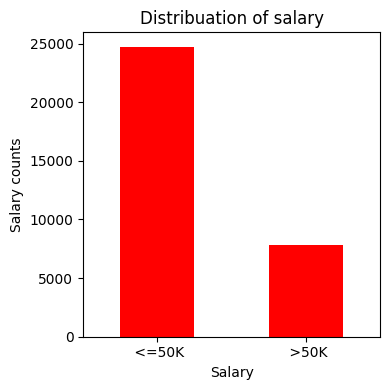

In [ ]:
#visualize the salary frequency bar plot
salary_counts=df['salary'].value_counts()

plt.figure(figsize=(4,4))
salary_counts.plot(kind='bar',color='red')
plt.title("Distribuation of salary")
plt.xlabel("Salary")
plt.ylabel("Salary counts")
plt.xticks(rotation=0)
plt.tight_layout()

Note:   
We can see that <=50k values 24720 and >50k values 7841. This is our 'Imbalance dataset' because the target class is skewed.

Replacing missing value

In [7]:
df.replace(" ?",np.nan, inplace=True)

In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

Observations:  
We can see that missing values variables are categorical so replace the missing value by mode.

In [9]:
df['workclass'].value_counts()
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

EXPLORATORY DATA ANALYSIS

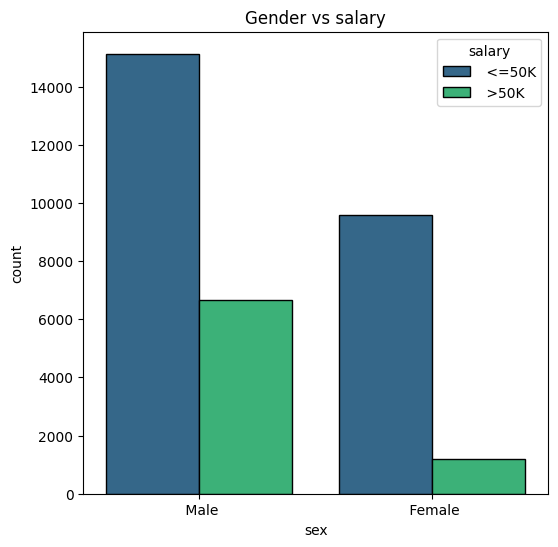

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['sex'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.title("Gender vs salary")
plt.show()

Obsrvations:   
From the double bar plot we can say that Male employee is greater than female employee. Maximum salary is less than equal to 50k for both male amd female employee. In the scene of female employ grater 50k salary is less near 1500.

<Axes: xlabel='workclass', ylabel='Count'>

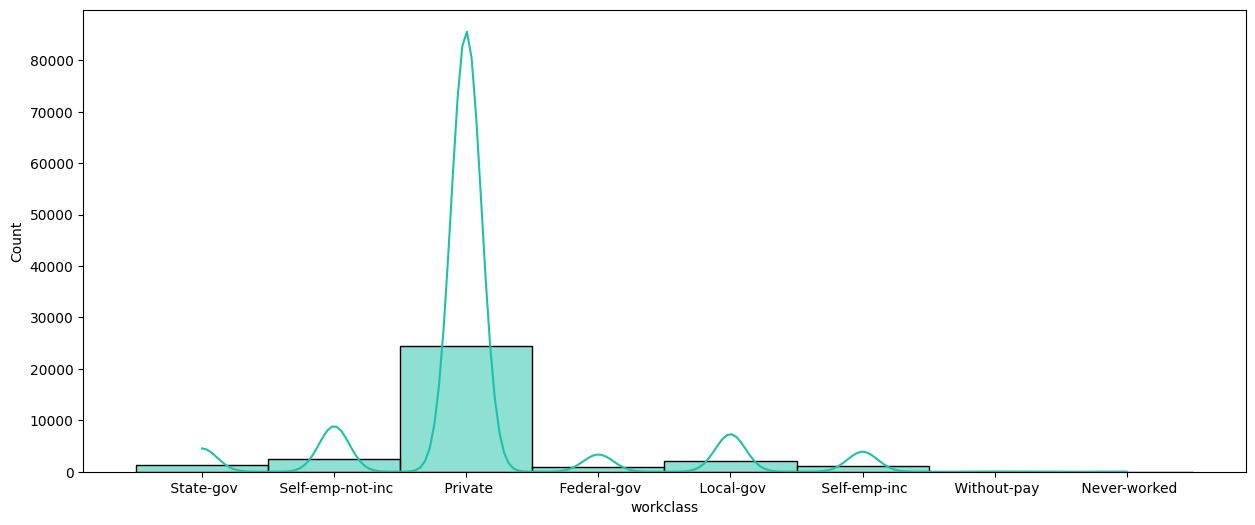

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(data=df['workclass'], x=df['workclass'], element="bars",kde=True, color="#1dc2a6")

Observations:   
From the above histogram we can say that the overall maximum employee working in private sector and other sectors working employee are less.

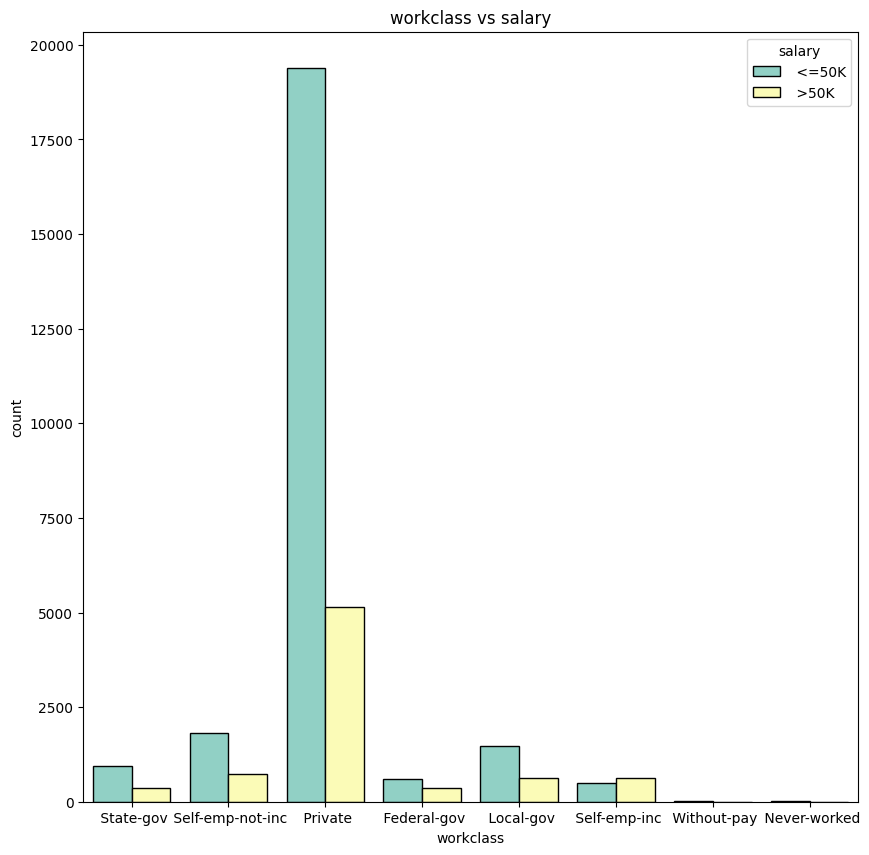

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['workclass'],hue=df['salary'],palette='Set3',saturation=0.9,edgecolor="black")
plt.title("workclass vs salary")
plt.show()

Observations:     
we have already seen private sector employees are more than other sectors. From here we see the more employee got less than 50k salary which is easily identified and the minimum of got greater than 50k.

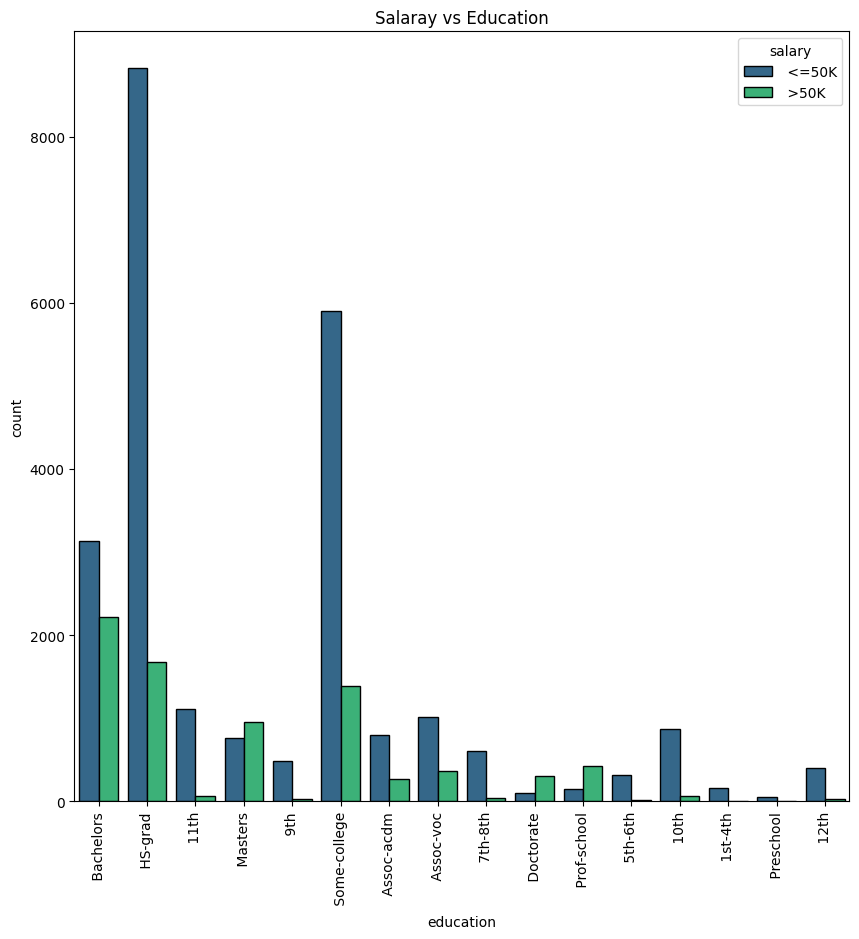

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['education'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.title("Salaray vs Education")
plt.xticks(rotation=90)
plt.show()

Observations:   
whoes are did their Bachelors, HS-grad and College their employee rate is high but got less than 50K salary. But who are did their doctorate, Masters and school professors their employee rate is low but got above 50k salary.

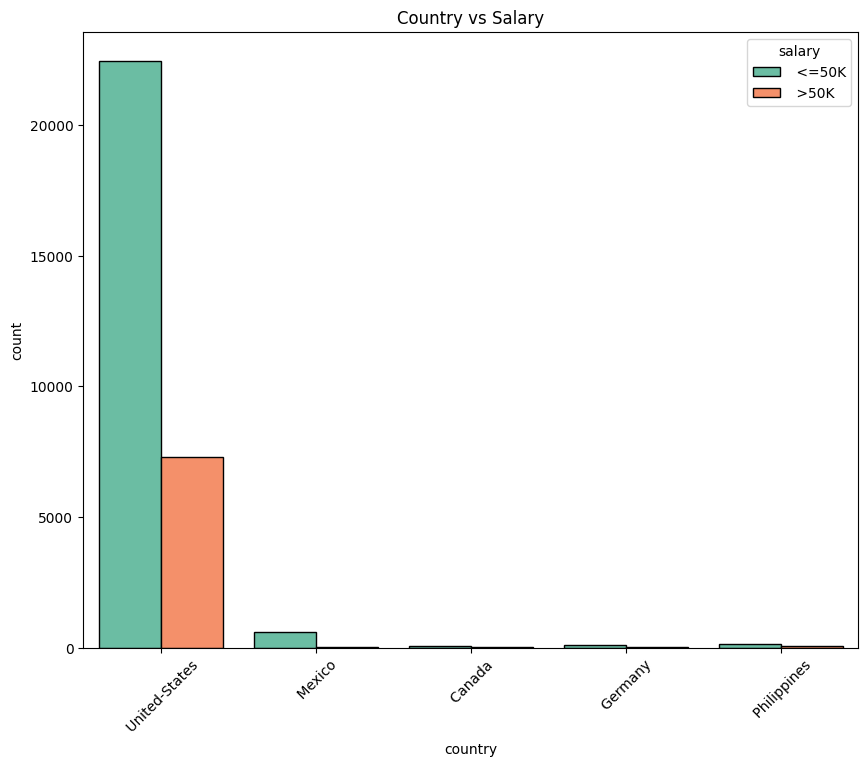

In [ ]:
top_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_countries)]
plt.figure(figsize=(10, 8))
sns.countplot(x='country', hue='salary', data=df_top_countries, palette='Set2', saturation=0.9, edgecolor="black")
plt.title("Country vs Salary")
plt.xticks(rotation=45)
plt.show()

Observations:  
Maximum employee from Us.

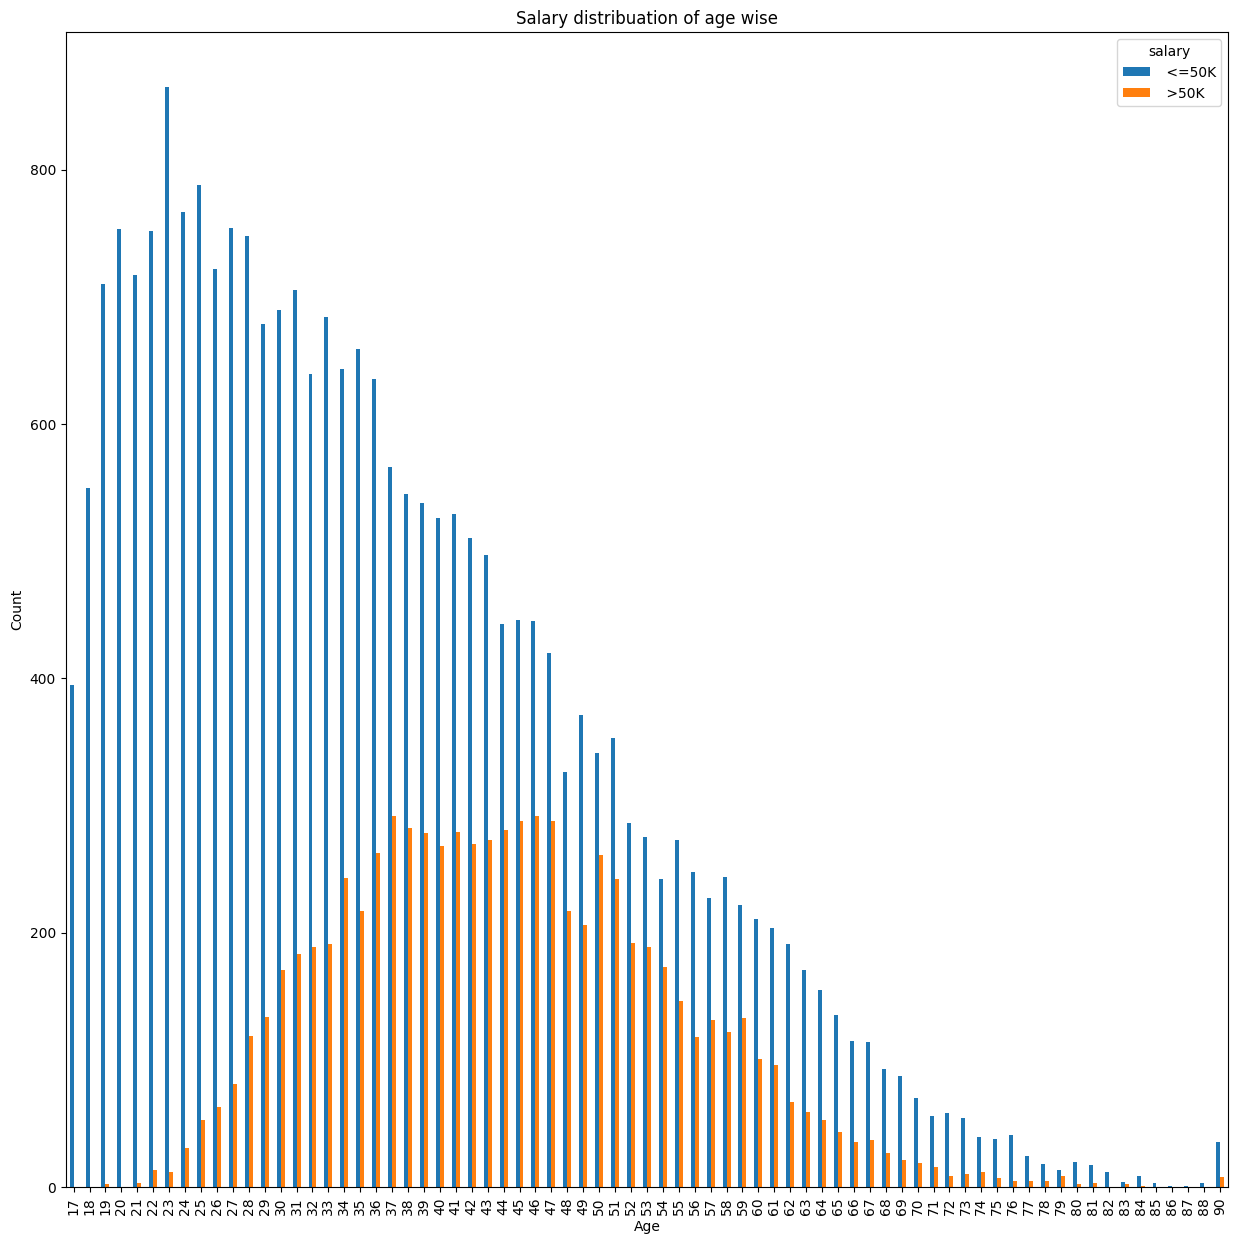

In [ ]:
crosstb = pd.crosstab(df.age, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,15))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Salary distribuation of age wise")
plt.xticks(rotation = 90)
plt.show()

Observations:   
overall all ages employees salary is less than 50k but from age 37-48  maximum employees salary is greater 50k and allover grater 50k salary rate is low which we already saw before.

Text(0.5, 1.0, 'Salary distribuation based on Marital status')

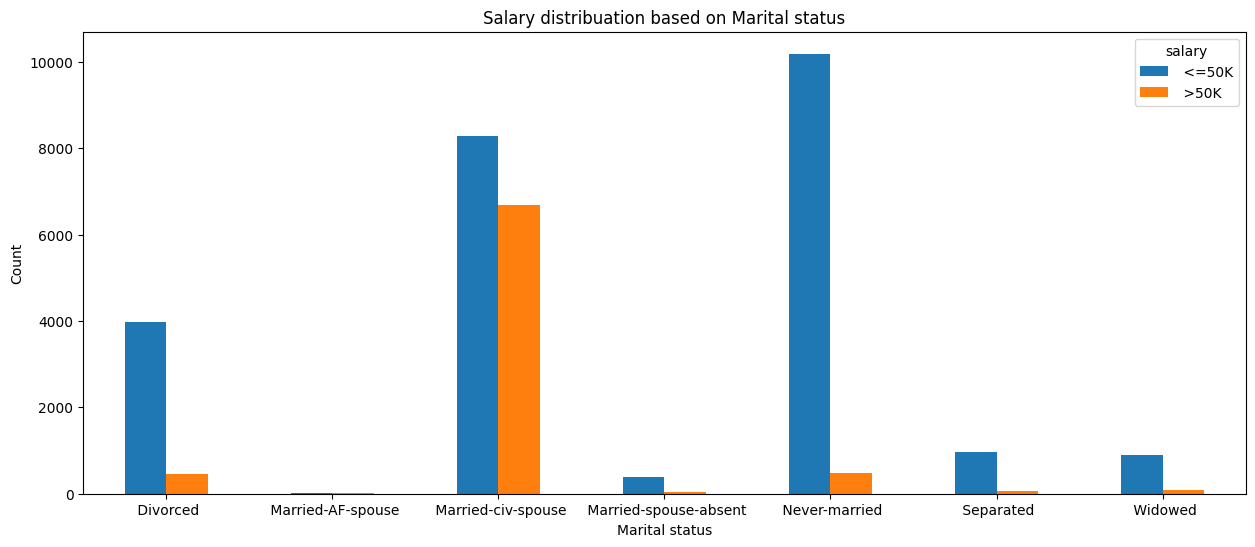

In [ ]:
crosstb = pd.crosstab(df["marital-status"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Salary distribuation based on Marital status")

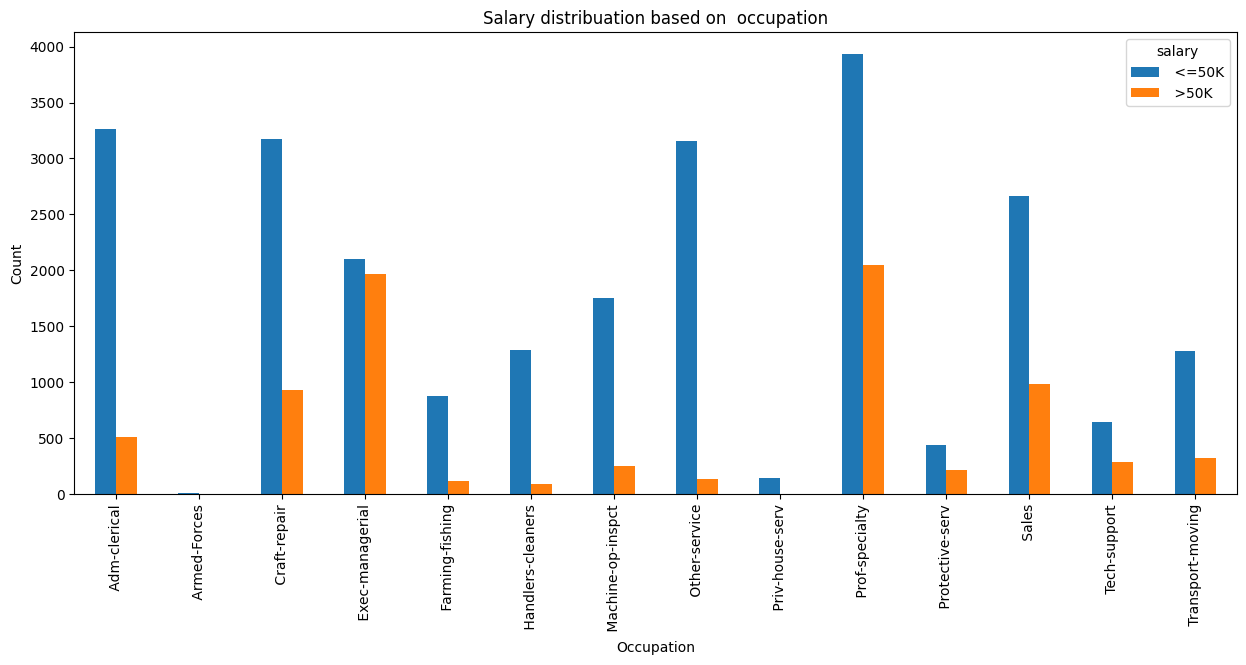

In [ ]:
crosstb = pd.crosstab(df.occupation, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Salary distribuation based on  occupation")
plt.show()

Observations:   
Maximum employees are from Professors, adm-clerical, services, craft repair department. Exec-managerical department employees >50k and <50k salary ration approximately equal. Whose are from private house service their salary always less than 50k. Comparatively profesors salary is more 50k than other occupations.

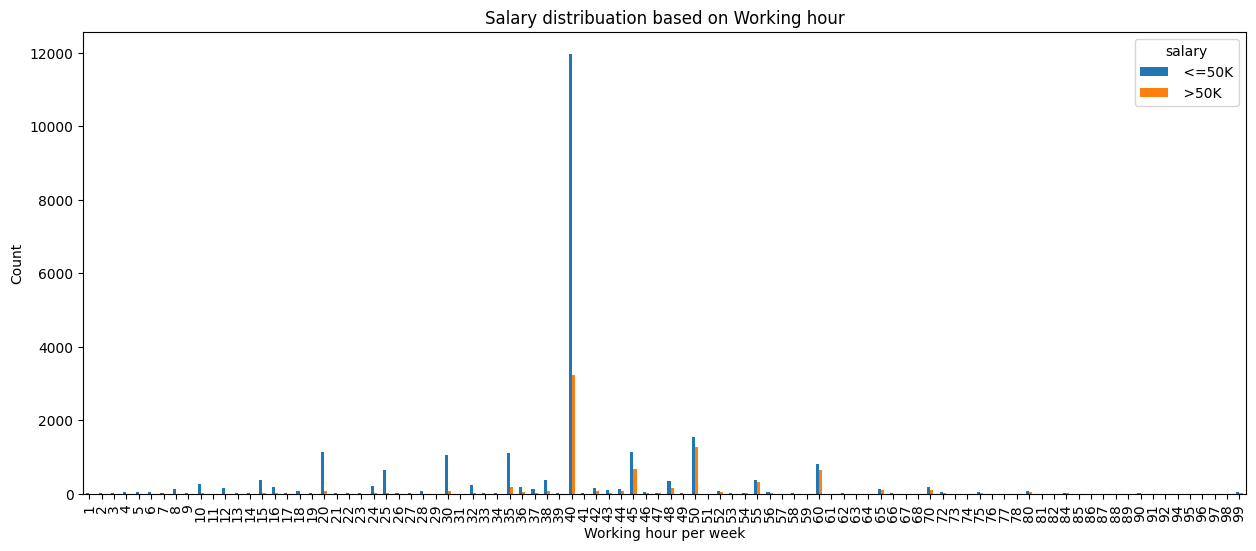

In [ ]:
crosstb = pd.crosstab(df["hours-per-week"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.xlabel("Working hour per week")
plt.ylabel("Count")
plt.title("Salary distribuation based on Working hour")
plt.show()

Observations:   
Maiximum employees works weekly 40 hours.

Classification agorithms:     
In this binary classification problem we use Logistic regression, Decision tree classification, Random forest and XGBoost classification algorithms.

Normalize the numerical variables

Normalization is important for logistic regression to ensure that features are on a similar scale. This prevents one feature from dominating the others, allowing the optimization algorithm to converge faster and resulting in a more stable and accurate model. It helps the logistic regression coefficients represent meaningful comparisons among features. Without normalization in logistic regression, features with different scales can lead to biased coefficient estimates.

In [10]:
# list the numerical variables
numeric_columns=[]
for col in df.columns:
  if df[col].dtype=='int64':
    numeric_columns.append(col)
print("The numerical features of the dataset:",numeric_columns)

The numerical features of the dataset: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


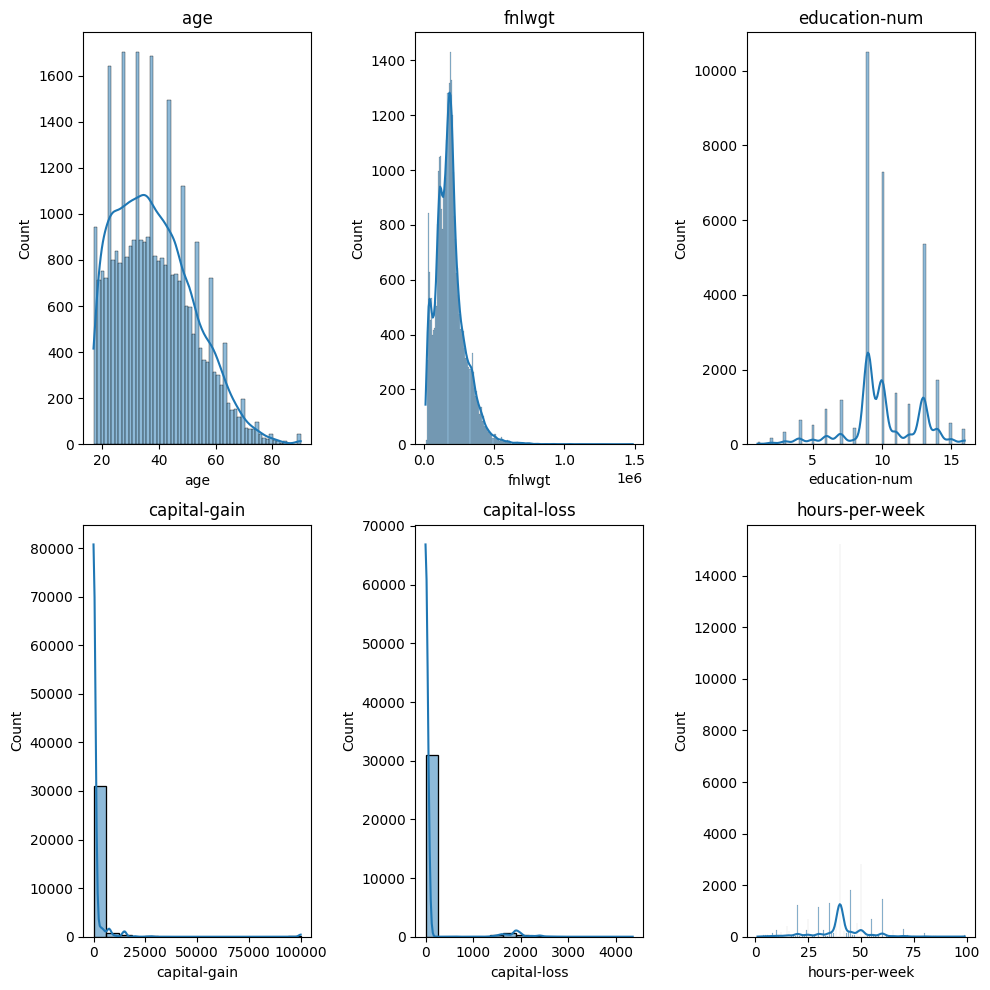

In [11]:
#Distribuation plot of every numerical variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

sns.histplot(data=df, x="age", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="fnlwgt", kde=True, ax=axes[0, 1])
sns.histplot(data=df, x="education-num", kde=True, ax=axes[0,2])
sns.histplot(data=df, x="capital-gain", kde=True, ax=axes[1, 0])
sns.histplot(data=df, x="capital-loss", kde=True, ax=axes[1, 1])
sns.histplot(data=df, x="hours-per-week", kde=True, ax=axes[1, 2])

axes[0, 0].set_title("age")
axes[0, 1].set_title("fnlwgt")
axes[0,2].set_title("education-num")
axes[1, 0].set_title("capital-gain")
axes[1, 1].set_title("capital-loss")
axes[1, 2].set_title("hours-per-week")

plt.tight_layout()
plt.show()

Observations:       
The variables 'education-num' and 'hours-per-wek' approximately follows normal distribution but 'age' and 'fnlwgt' are skewed so we have to use log transformation to get a normal distribuation. Also we see that 'capital-gain' and 'capital-loss' are also skewed and maximum value fall near 0 value so we don't use log transformation because if we transform log(0) it is undefined so the algorithms won't work well. so solve this situation we can standarized the values or not. it doesnot effet on the accuracy.


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='age', ylabel='Count'>

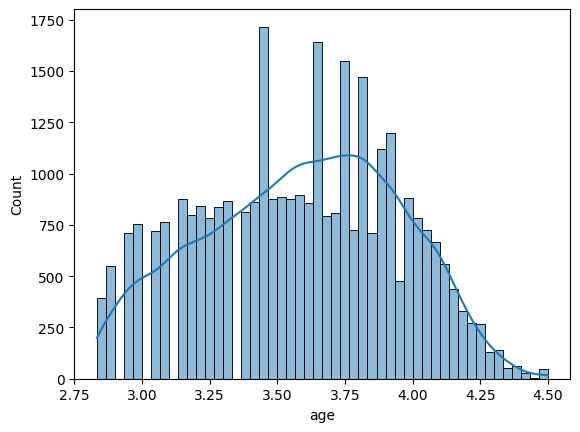

In [12]:
sns.histplot(data=df, x=np.log(df["age"]), kde=True)

<Axes: xlabel='fnlwgt', ylabel='Count'>

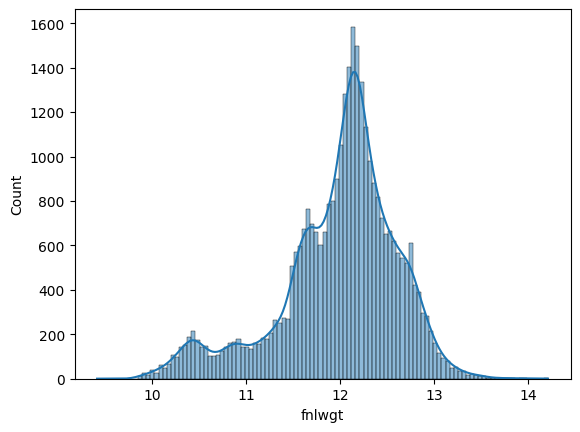

In [13]:
sns.histplot(data=df, x=np.log(df["fnlwgt"]), kde=True)

Observations:   
Using the log transformations 'age' and 'fnlwgt' are now approximately follows guassian distribuation.

In [14]:
# List of numerical columns you want to normalize
# Apply logarithm transformation to add the dataset df
numerical_columns = ['age', 'fnlwgt']

for numerical_column in numerical_columns:
    df[numerical_column] = np.log(df[numerical_column])

In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3.637586,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3.970292,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,3.332205,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Encoding the categorical variables

Using Target Encoder:    
It replaces each category with the mean to target variable of the target variable for that category. This technique is particularly used when we have classification problems.

In [16]:
df=df.drop(['education'],axis=1)

In [17]:
df['salary']=df['salary'].map({' <=50K':0,' >50K':1})

In [18]:
# list out the categorical columns
object_columns=[]

for col in df.columns:
  if df[col].dtype=='object':
    object_columns.append(col)
print(object_columns)

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']


In [19]:
# Specify the list of categorical columns for target encoding
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']

df = df.copy()
for col in categorical_columns:
    encoding_map = df.groupby(col)['salary'].mean()
    df[col] = df[col].map(encoding_map)

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,3.663562,0.271957,11.258240,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245925,0
1,3.912023,0.284927,11.330336,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245925,0
2,3.637586,0.210093,12.281393,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245925,0
3,3.970292,0.210093,12.366153,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245925,0
4,3.332205,0.210093,12.732011,13,0.446848,0.342637,0.475128,0.12388,0.109461,0,0,40,0.263158,0


Split the dataset into train and test set

In [20]:
#divide the dataset into dependent and independent features
X=df.iloc[:,:-1].values
y=df.iloc[:,-1]            # 'Salary' is here target variable

In [ ]:
X

array([[ 3.66356165,  0.27195686, 11.25823965, ...,  0.        ,
        40.        ,  0.24592478],
       [ 3.91202301,  0.28492719, 11.33033587, ...,  0.        ,
        13.        ,  0.24592478],
       [ 3.63758616,  0.21009294, 12.28139345, ...,  0.        ,
        40.        ,  0.24592478],
       ...,
       [ 4.06044301,  0.21009294, 11.93104352, ...,  0.        ,
        40.        ,  0.24592478],
       [ 3.09104245,  0.21009294, 12.21349503, ...,  0.        ,
        20.        ,  0.24592478],
       [ 3.95124372,  0.55734767, 12.57046225, ...,  0.        ,
        40.        ,  0.24592478]])

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [21]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
#standarizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
rg=LogisticRegression()

In [24]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[0.5,0.8,1,2,3,5,6,8,9,10,21],
           'max_iter':[100,200,300],
           }

In [25]:
classifier_rg=GridSearchCV(rg,param_grid=parameter,scoring='accuracy',cv=10)
classifier_rg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.8, 1, 2, 3, 5, 6, 8, 9, 10, 21],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [26]:
print(classifier_rg.best_params_)

{'C': 1, 'max_iter': 100}


In [27]:
print(classifier_rg.best_score_)

0.8480491256622766


In [28]:
y_pred=classifier_rg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print("Testing Accuracy:",score)

Testing Accuracy: 0.8484569322892677


In [30]:
rg.fit(X_train,y_train)
y_pred_train = rg.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8484336609336609


In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5247
           1       0.59      0.74      0.66      1266

    accuracy                           0.85      6513
   macro avg       0.76      0.81      0.78      6513
weighted avg       0.87      0.85      0.85      6513



Conclusion:      
The model shows strong precision and recall values for Class 0, indicating that it is effective in correctly identifying instances belonging to this class. The F1-score, which considers both precision and recall, is also notably high for Class 0, further emphasizing the model's capability in distinguishing Class 0 instances.    
However, when it comes to Class 1, the model exhibits relatively lower precision and recall values. While the precision of 0.59 suggests that the model accurately identifies a portion of Class 1 instances, the recall of 0.74 indicates that it could potentially miss some true positive cases. The resulting F1-score of 0.66 indicates that the model's performance for Class 1 could be improved.     
The overall accuracy of 0.85 suggests that the model is able to make accurate predictions on a substantial portion of the dataset.
In summary, the logistic model's effectiveness is notably higher for Class 0, with a strong balance between precision and recall. However, for Class 1, there is room for improvement to achieve a better trade-off between precision and recall.

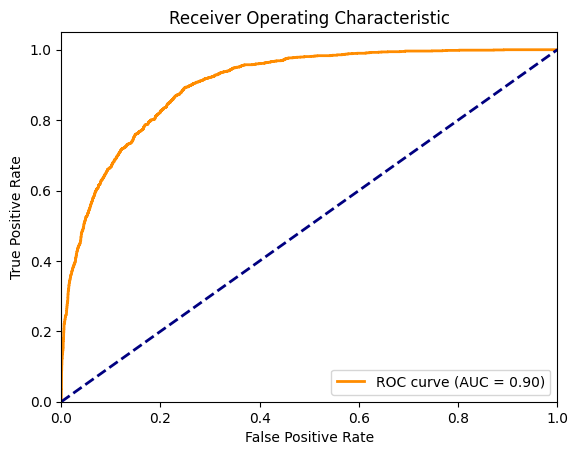

In [32]:
#AOC-RUC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Get predicted probabilities for the positive class
predicted_probs = rg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predicted_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Observations:   
From the above ROC curve show that at point 0.2 FP the TP is high. so for this 0.2 point we find out the threshold value.

In [48]:
# Predict probabilities for the positive class
y_pred_prob = rg.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create a DataFrame to store threshold, true positive, and false positive values
threshold_table = pd.DataFrame({'Threshold': thresholds,
                                'True Positive Rate (TPR)': tpr,
                                'False Positive Rate (FPR)': fpr})

# Display the table
print(threshold_table)


      Threshold  True Positive Rate (TPR)  False Positive Rate (FPR)
0      2.000000                  0.000000                   0.000000
1      1.000000                  0.329988                   0.074910
2      1.000000                  0.331422                   0.076708
3      1.000000                  0.336952                   0.077907
4      1.000000                  0.339820                   0.079305
...         ...                       ...                        ...
2766   0.999977                  0.999590                   0.983220
2767   0.999975                  0.999795                   0.983220
2768   0.999836                  0.999795                   0.994207
2769   0.999829                  1.000000                   0.994207
2770   0.994580                  1.000000                   1.000000

[2771 rows x 3 columns]


In [61]:
# Define the desired False Positive Rate (FPR) value
desired_fpr = 0.2

# Filter the table to find the row with the closest FPR value to the desired value
closest_row = threshold_table.iloc[(threshold_table['False Positive Rate (FPR)'] - desired_fpr).abs().argsort()[0]]

# Extract the threshold value from the closest row
threshold_at_desired_fpr = closest_row['Threshold']

# Print the threshold value at the desired FPR
print("Desired False Positive Rate (FPR):", desired_fpr)
print("Threshold at Desired FPR:", threshold_at_desired_fpr)


Desired False Positive Rate (FPR): 0.2
Threshold at Desired FPR: 0.9999999999964968


In [64]:
# Define the threshold
threshold = 0.9999999999964968

# Create binary predictions based on the threshold
y_pred_binary = (y_pred_prob >= threshold).astype(int)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = sum((y_test == 1) & (y_pred_binary == 1))
TN = sum((y_test == 0) & (y_pred_binary == 0))
FP = sum((y_test == 0) & (y_pred_binary == 1))
FN = sum((y_test == 1) & (y_pred_binary == 0))

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the accuracy
print("Accuracy with threshold {:.2f}: {:.2f}%".format(threshold, accuracy * 100))


Accuracy with threshold 1.00: 71.71%


OBSERVATION:    
when a very high threshold of 1.00 is applied to a logistic classification model, it results in an accuracy of 71.71%. In this context, a threshold of 1.00 means that the model only predicts a positive class (1) when it is extremely certain about its prediction, essentially making very conservative positive predictions. As a result, the model correctly identifies a significant portion of true positive cases but might miss some positive instances, leading to a lower overall accuracy compared to a lower threshold.

DECISSION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#post prunning
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[10],
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha':[0.01],
    'min_samples_split':[5,4,6,8],
    'min_samples_leaf':[2,3,4,5]
}

In [ ]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,scoring='accuracy',cv=10)

In [ ]:
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.01],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [5, 4, 6, 8]},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [ ]:
y_pred1=cv.predict(X_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
dt.fit(X_train,y_train)
y_pred_train = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training acuuracy:",train_accuracy)

Training acuuracy: 1.0


In [ ]:
score=accuracy_score(y_pred1,y_test)
print("Testing acuuracy:",score)

Testing acuuracy: 0.8363273453093812


In [ ]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5452
           1       0.50      0.75      0.60      1061

    accuracy                           0.84      6513
   macro avg       0.72      0.80      0.75      6513
weighted avg       0.87      0.84      0.85      6513



Observations:    
The classification report shows a high precision, recall, F1-score, and support values for class 0 and class 1. For class 0 observations, the model performs well in precision, recall, and F1-score, with a 93% accuracy rate. For class 1, the model has a lower precision and recall, with a higher F1-score of 0.65. However, there is room for improvement in class 1 instances, with a lower F1-score and support value of 1254. Overall, the model performs well in class 0 instances, but there is room for improvement in class 1 instances. Further improvement is needed, especially for class 1.

From decission tree classifier is a overfitting situation in this scenario.

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd26febbb0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd26fea500>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd26feb1f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd26feb880>},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 139}

In [ ]:
best_estimator = random_search.best_estimator_

In [ ]:
rf.fit(X_train,y_train)
y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training acuuracy:",train_accuracy)

Training acuuracy: 1.0


In [ ]:
# Evaluate the model on the test set
y_pred2 = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Random Forest Testing Accuracy: {:.2f}%".format(accuracy * 100))    #84.75%

Random Forest Testing Accuracy: 86.12%


In [ ]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5210
           1       0.63      0.77      0.69      1303

    accuracy                           0.86      6513
   macro avg       0.78      0.83      0.80      6513
weighted avg       0.88      0.86      0.87      6513



Observations:    
The Random Forest model performs well in precision and recall for class 0, predicting the negative class 93% of the time. However, it has lower precision and recall for class 1, suggesting room for improvement in predicting the positive class. The F1-scores provide a balanced view of the model's performance for both classes, with an overall accuracy of 85%. Support represents the number of actual instances in each class. The model's overall accuracy is 85%, with a macro average of 0.76, recall of 0.81, and F1-score of 0.78. Further tuning or handling of class imbalance may improve the model's performance for class 1.


From Random forest classifier is a overfitting situation in this scenario.

XGBoost

In [ ]:
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=42)

In [ ]:
# hyperparameter tuning
params={
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3,0.35],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_child_weight': [1,3,5,7,9,8],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'n_estimators':[100,200,300],
    'alpha':[1,2,3]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search1=RandomizedSearchCV(xg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [ ]:
random_search1.fit(X_train,y_train)
# random_search1.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=42, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3],
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7, 9, 8],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [ ]:
random_search1.best_estimator_

XGBClassifier(alpha=3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
random_search1.best_params_

{'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.6,
 'colsample_bytree': 0.5,
 'alpha': 3}

In [ ]:
xg.fit(X_train,y_train)
y_pred_train = xg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training acuuracy:",train_accuracy)

Training acuuracy: 0.9076320638820639


In [ ]:
y_pred = random_search1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" XGBoost testing Accuracy: {:.2f}%".format(accuracy * 100))

print(classification_report(y_pred,y_test))

 XGBoost testing Accuracy: 86.49%
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      5218
           1       0.63      0.78      0.70      1295

    accuracy                           0.86      6513
   macro avg       0.79      0.83      0.80      6513
weighted avg       0.88      0.86      0.87      6513



Observations:  
The XGBoost model achieved an accuracy of 86.58% on the testing dataset, demonstrating strong overall performance. It excels in class 0 instances, achieving high precision, recall, and F1-score. However, there is room for improvement in class 1 instances, as indicated by lower precision, recall, and F1-score compared to class 0. Further refinement or data preprocessing may be considered to enhance the model's performance, especially for class 1. Overall, the XGBoost model demonstrates strong overall performance, with a high precision, recall, and F1-score for class 0 instances.

From XGBoost classifier is a overfitting situation in this scenario.

Without normalizing

In [65]:
df1=pd.read_csv("/content/adult.csv")
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
df1=df1.drop(["education"],axis=1)

In [67]:
df1['salary']=df1['salary'].map({' <=50K':0,' >50K':1})

In [68]:
# Specify the list of categorical columns for target encoding
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']

df1 = df1.copy()
for col in categorical_columns:
    encoding_map = df1.groupby(col)['salary'].mean()  #  'salary' is your target variable
    df1[col] = df1[col].map(encoding_map)

In [69]:
df1.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0.271957,77516,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245835,0
1,50,0.284927,83311,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245835,0
2,38,0.218673,215646,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245835,0
3,53,0.218673,234721,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245835,0
4,28,0.218673,338409,13,0.446848,0.449034,0.475128,0.12388,0.109461,0,0,40,0.263158,0


In [70]:
#divide the dataset into dependent and independent features
X=df1.iloc[:,:-1].values
y=df1.iloc[:,-1]

Work with imbalanced data

In [71]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

LOGISTIC REGRESSION

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,3.663562,0.271957,11.258240,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245925,0
1,3.912023,0.284927,11.330336,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245925,0
2,3.637586,0.210093,12.281393,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245925,0
3,3.970292,0.210093,12.366153,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245925,0
4,3.332205,0.210093,12.732011,13,0.446848,0.342637,0.475128,0.12388,0.109461,0,0,40,0.263158,0


In [ ]:
from sklearn.linear_model import LogisticRegression
rg=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[1,2,3,5,6,8,9,10,21],
           'max_iter':[100,200,300],
           }

In [ ]:
classifier_rg=GridSearchCV(rg,param_grid=parameter,scoring='accuracy',cv=10)
classifier_rg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 6, 8, 9, 10, 21],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print(classifier_rg.best_params_)

{'C': 1, 'max_iter': 100}


In [ ]:
print(classifier_rg.best_score_)

0.7980647814819074


In [ ]:
y_pred=classifier_rg.predict(X_test)

In [ ]:
rg.fit(X_train,y_train)
y_pred_train = rg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training acuuracy:",train_accuracy)

Training acuuracy: 0.7981035012285013


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print("Testing Accuracy:",score)

Testing Accuracy: 0.7931828650391525


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      5955
           1       0.25      0.72      0.37       558

    accuracy                           0.79      6513
   macro avg       0.61      0.76      0.63      6513
weighted avg       0.91      0.79      0.83      6513



Observations:  
The logistic regression without normalization results show a 97% accuracy rate for negative class (0) and a 25% accuracy rate for positive class (1). The model is effective in avoiding false positives for class 0 and moderately effective in capturing true positives for class 1. The F1-score is a balanced measure of precision and recall for class 0 and class 1, respectively. The support represents the number of actual instances in each class. The overall accuracy is 79%, with a macro average of 0.61, recall of 0.76, and F1-score of 0.63. The weighted average considers class imbalance and provides an overall performance measure.

Decission tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#post prunning
dt1=DecisionTreeClassifier(random_state=42)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt1.fit(X_train,y_train)
# Make predictions on the training data
y_pred_train = dt1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Traing accuracy:",train_accuracy)

Traing accuracy: 1.0


In [ ]:
parameter={
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

In [ ]:
cv = RandomizedSearchCV(
    dt1,param_distributions=parameter,n_iter=100,  cv=5,  scoring='accuracy', n_jobs=-1,
    random_state=42
)

In [ ]:
cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd252b3b80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd252b0f70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7abd252b0790>,
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 19,
 'splitter': 'best'}

In [ ]:
y_pred1=cv.predict(X_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
score1=accuracy_score(y_pred1,y_test)
print("Testing accuracy of Decission tree without normalizing:",score1)


Testing accuracy of Decission tree without normalizing: 0.855366190695532


In [ ]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5214
           1       0.61      0.75      0.67      1299

    accuracy                           0.86      6513
   macro avg       0.77      0.82      0.79      6513
weighted avg       0.87      0.86      0.86      6513



Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,oob_score=True)

In [78]:
from scipy.stats import randint
param_dist1 = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [79]:
def oob_score_averager(estimator,X_train,y_train):
  return estimator.oob_score_

In [81]:
from sklearn.model_selection import RandomizedSearchCV
random_search2 = RandomizedSearchCV(
    rf, param_distributions=param_dist1, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

In [82]:
random_search2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e47f160>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b7783022a10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e47f940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e47f490>},
                   random_state=42, scoring='accuracy')

In [83]:
random_search2.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 181}

In [84]:
best_estimator = random_search2.best_estimator_

In [85]:
print("Average OOB Score:", random_search2.best_score_)  #0.8631752862125595

Average OOB Score: 0.8687421261518065


In [86]:
rf.fit(X_train,y_train)
# Make predictions on the training data
y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Traing accuracy:",train_accuracy) #0.9999616093366094

Traing accuracy: 0.9999616093366094


In [87]:
# Evaluate the model on the test set
y_pred = random_search2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest testing Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest testing Accuracy: 86.17%


In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5245
           1       0.62      0.77      0.69      1268

    accuracy                           0.86      6513
   macro avg       0.78      0.83      0.80      6513
weighted avg       0.88      0.86      0.87      6513



XG BOOST

In [ ]:
import xgboost as xgb
xg=xgb.XGBClassifier()

In [ ]:
params={
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3,0.35],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_child_weight': [1,3,5,7,9,8],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'n_estimators':[100,200,300],
    'alpha':[1,2,3]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search3=RandomizedSearchCV(xg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [ ]:
random_search3.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3],
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7, 9, 8],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [ ]:
random_search3.best_estimator_

XGBClassifier(alpha=3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
random_search3.best_params_

{'n_estimators': 300,
 'min_child_weight': 8,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4,
 'alpha': 3}

In [ ]:
xg.fit(X_train,y_train)
# Make predictions on the training data
y_pred_train = xg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Traing accuracy:",train_accuracy)

Traing accuracy: 0.9090909090909091


In [ ]:
y_pred = random_search3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" XGBoost testing Accuracy: {:.2f}%".format(accuracy * 100))

 XGBoost testing Accuracy: 86.86%


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      5118
           1       0.67      0.76      0.71      1395

    accuracy                           0.87      6513
   macro avg       0.80      0.83      0.81      6513
weighted avg       0.88      0.87      0.87      6513



Work with imbalance to  balance data

In [135]:
from imblearn.over_sampling import RandomOverSampler
y.value_counts(normalize=True)
rs = RandomOverSampler(random_state=30)
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [136]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

In [137]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=0)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Logistic regression

In [139]:
from sklearn.linear_model import LogisticRegression
rg=LogisticRegression()

In [140]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[1,2,3,5,6,8,9,10,21],
           'max_iter':[100,200,300],
           }

In [142]:
classifier_rg=GridSearchCV(rg,param_grid=parameter,scoring='accuracy',cv=10)
classifier_rg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 5, 6, 8, 9, 10, 21],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [143]:
print(classifier_rg.best_params_)

{'C': 1, 'max_iter': 100}


In [144]:
print(classifier_rg.best_score_)

0.8160395961135066


In [145]:
y_pred=classifier_rg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print("Testing Accuracy:",score)

Testing Accuracy: 0.8213996763754046


In [146]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4882
           1       0.83      0.81      0.82      5006

    accuracy                           0.82      9888
   macro avg       0.82      0.82      0.82      9888
weighted avg       0.82      0.82      0.82      9888



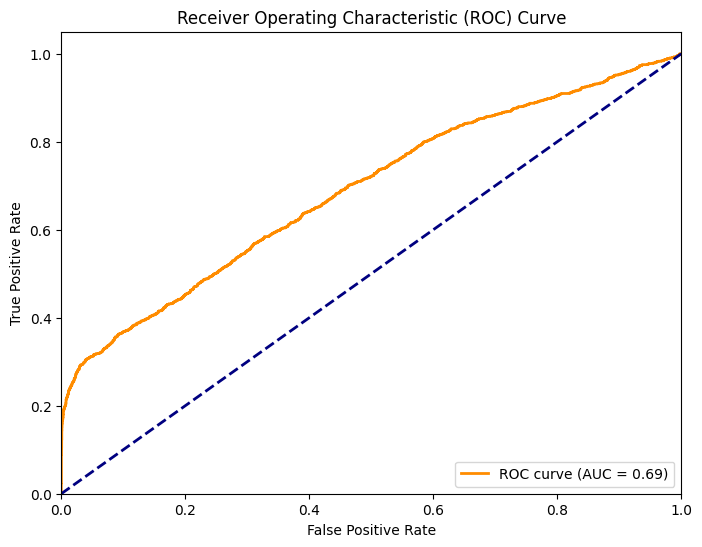

In [147]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you have your imbalanced dataset with features 'X' and labels 'y'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and fit a Logistic Regression model on the balanced training data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class (1) on the test data
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC-ROC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [149]:
# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create a DataFrame to store threshold, true positive, and false positive values
threshold_table = pd.DataFrame({'Threshold': thresholds,
                                'True Positive Rate (TPR)': tpr,
                                'False Positive Rate (FPR)': fpr})

# Display the table
print(threshold_table)

      Threshold  True Positive Rate (TPR)  False Positive Rate (FPR)
0      2.000000                  0.000000                   0.000000
1      1.000000                  0.000637                   0.000000
2      1.000000                  0.003183                   0.000000
3      1.000000                  0.004456                   0.000000
4      1.000000                  0.006365                   0.000000
...         ...                       ...                        ...
1971   0.190308                  0.997454                   0.996965
1972   0.184859                  0.998727                   0.996965
1973   0.171596                  0.998727                   0.997369
1974   0.160424                  1.000000                   0.997369
1975   0.039146                  1.000000                   1.000000

[1976 rows x 3 columns]


In [157]:
# Define the desired False Positive Rate (FPR) value
desired_fpr = 0.05

# Filter the table to find the row with the closest FPR value to the desired value
closest_row = threshold_table.iloc[(threshold_table['False Positive Rate (FPR)'] - desired_fpr).abs().argsort()[0]]

# Extract the threshold value from the closest row
threshold_at_desired_fpr = closest_row['Threshold']

# Print the threshold value at the desired FPR
print("Desired False Positive Rate (FPR):", desired_fpr)
print("Threshold at Desired FPR:", threshold_at_desired_fpr)

Desired False Positive Rate (FPR): 0.05
Threshold at Desired FPR: 0.6805491036280676


In [158]:
# Define the threshold
threshold = 0.6805491036280676

# Create binary predictions based on the threshold
y_pred_binary = (y_pred_prob >= threshold).astype(int)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = sum((y_test == 1) & (y_pred_binary == 1))
TN = sum((y_test == 0) & (y_pred_binary == 0))
FP = sum((y_test == 0) & (y_pred_binary == 1))
FN = sum((y_test == 1) & (y_pred_binary == 0))

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print the accuracy
print("Accuracy with threshold {:.2f}: {:.2f}%".format(threshold, accuracy * 100))

Accuracy with threshold 0.68: 79.69%


Decission tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#post prunning
dt1=DecisionTreeClassifier()
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
dt1.fit(X_train,y_train)
y_pred_train = dt1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

In [ ]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[10],
    'max_features':['auto','sqrt','log2'],
    'ccp_alpha':[0.01],
    'min_samples_split':[5,4,6,8],
    'min_samples_leaf':[2,3,4,5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier(max_depth=2)
cv=GridSearchCV(treemodel,param_grid=parameter,scoring='accuracy',cv=10)

In [ ]:
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'ccp_alpha': [0.01],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [5, 4, 6, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [ ]:
y_pred1=cv.predict(X_test)

In [ ]:
y_pred1

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
score1=accuracy_score(y_pred1,y_test)
print(score1)    #84.43  #82

0.7650687702265372


In [ ]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      4121
           1       0.85      0.72      0.78      5767

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.76      9888
weighted avg       0.78      0.77      0.77      9888



Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,oob_score=True,random_state=0)

In [91]:
param_dist3 = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [92]:
def oob_score_averager(estimator,X_train,y_train):
  return estimator.oob_score_

In [93]:
random_search4 = RandomizedSearchCV(
    rf, param_distributions=param_dist3, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)

In [94]:
random_search4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(oob_score=True,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e586c20>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e471ab0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e587370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b777e472bc0>},
                   random_state=42, scoring='accuracy')

In [95]:
random_search4.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 149}

In [96]:
best_estimator = random_search4.best_estimator_

In [97]:
random_search4.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 149}

In [98]:
print("Average OOB Score:", random_search4.best_score_)

Average OOB Score: 0.8685501949416501


In [100]:
y_pred = random_search4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))  #93.36

Random Forest Accuracy: 86.09%


In [101]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5214
           1       0.62      0.77      0.69      1299

    accuracy                           0.86      6513
   macro avg       0.78      0.82      0.80      6513
weighted avg       0.88      0.86      0.87      6513



XGBoost

In [ ]:
import xgboost as xgb
xg=xgb.XGBClassifier()

In [ ]:
params={
    'learning_rate': [0.05,0.1,0.15,0.2,0.25,0.3,0.35],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_child_weight': [1,3,5,7,9,8],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'n_estimators':[100,200,300],
    'alpha':[1,2,3]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search5=RandomizedSearchCV(xg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [ ]:
random_search5.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 3],
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 3, 5, 7, 9, 8],
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=1)

In [ ]:
random_search5.best_estimator_

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
random_search5.best_params_

{'n_estimators': 200,
 'min_child_weight': 9,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.9,
 'colsample_bytree': 0.7,
 'alpha': 1}

In [ ]:
y_pred = random_search5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" XGBoost testing Accuracy: {:.2f}%".format(accuracy * 100))  #87

 XGBoost testing Accuracy: 88.05%


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4684
           1       0.91      0.86      0.88      5204

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888



OVERALL INTERPRETATION:

1. Comparision between with normalization and without normalization data:   
            i. Logistic regression:  
The logistic regression model exhibited a notable improvement in its overall performance after normalizing the numerical parameters. Prior to normalization, the model achieved an accuracy of 79%, with impressive precision for Class 0 (97%) but suffered from low precision for Class 1 (25%). However, after normalization, the model's total accuracy increased to 85%, and it displayed a more balanced performance, with a significantly improved precision for Class 1 (59%). This suggests that the normalization process helped the model better handle the features and reduced the class imbalance issue. It indicates that normalizing the numerical parameters is a crucial preprocessing step for logistic regression, as it not only enhances overall accuracy but also greatly improves the model's ability to correctly classify the minority class (Class 1) while maintaining high precision for the majority class (Class 0). Finding out the threshold value usinf AUC-ROC curve that is at 0.2 false positive rate our threshold is 0.999 and in that point accuracy is 71%.  

            ii. Decision tree:
The observed changes in model performance before and after normalizing the parameters in the decision tree classifier reveal a significant improvement in overall accuracy from 84% to 86%. Additionally, the accuracy for the majority class (0) increased from 95% to 93%, indicating that the model continues to excel in correctly identifying negative cases. However, the most notable enhancement is in the minority class (1) accuracy, which rose from 50% to 61% after normalization. This demonstrates that parameter normalization has effectively improved the model's ability to identify positive cases, reducing the false negatives and increasing true positives. Therefore, the decision tree model has become more balanced and effective at making accurate predictions across both classes, making it a more reliable tool for the given classification task.

            iii. Random Forest   
The difference in model performance before and after normalizing the parameters in a random forest classifier suggests that parameter normalization had a minimal impact on the overall accuracy, which remained at 86%. However, the slight reduction in accuracy for the minority class (1) from 63% to 62% after normalization indicates that the normalization process may have led to a minor trade-off, potentially improving precision while marginally reducing recall for the positive class. This change suggests that the model, post-normalization, may be making more conservative positive predictions. In summary, while normalization stabilized the overall performance, it brought about a subtle shift in the model's ability to balance precision and recall for the minority class. the Out-of-Bag (OOB) score of 86% indicates that approximately 86% of the data points in the training set were correctly predicted by the individual decision trees within the ensemble. OOB score serves as an estimate of the model's accuracy on unseen data and suggests that the Random Forest is performing well on this dataset.
            iv. XGBoost classification    
The comparison of model performance in XGBoost before and after parameter normalization reveals positive trends in both scenarios. Initially, the model exhibited an overall accuracy of 86%, showcasing its capability to correctly classify data. It excelled in identifying the majority class (0) with an accuracy of 94%, demonstrating a strong understanding of negative cases. However, its performance in detecting the minority class (1) was somewhat lower at 63%. After parameter normalization, the total accuracy improved slightly to 87%, highlighting the effectiveness of normalization in enhancing the model's predictive power. Importantly, accuracy for the majority class remained high at 93%, indicating robust negative predictions. Most notably, the accuracy for the minority class increased to 67%, suggesting that normalization had a positive impact on the model's ability to capture positive instances. This improvement indicates a more balanced and accurate classification performance, making parameter normalization a valuable enhancement for XGBoost in this context.   


2. After making balance the data:   
Balancing the imbalanced dataset significantly influenced the performance of different classification algorithms. Logistic regression exhibited a noticeable improvement, achieving an accuracy of 82%, signifying its adaptability to balanced data. Decision trees, however, showed a slight decrease in accuracy to 77%, indicating potential sensitivity to class distribution. In contrast, random forests demonstrated robustness, maintaining an accuracy of 86%. Notably, XGBoost excelled after balancing, reaching an impressive 88% accuracy, showcasing its ability to capitalize on balanced datasets. Overall, balancing data proved to be a critical step, enhancing the classification capabilities of these algorithms. It particularly highlighted the strength of ensemble methods like random forests and XGBoost in handling balanced datasets effectively.


FUTURE SCOPE:    
In future iterations of the binary classification problem using Decision Trees,
Random Forest, and XGBoost on the census dataset, several key aspects can be addressed to improve model performance and mitigate overfitting. First, feature engineering and selection can be explored to identify the most relevant attributes for prediction. Secondly, more accurately we can try to handle hyperparameter tuning through techniques like Grid Search or Randomized Search can optimize model parameters for better generalization. Also, handling class imbalance, possibly through resampling techniques or class weights, can enhance the prediction of the positive class (class 1). Lastly, ensembling methods, such as blending or stacking, can be explored to combine the strengths of different algorithms. These approaches collectively aim to achieve higher accuracy and a more balanced prediction of the positive class, making the model more suitable for real-world applications of the census dataset.



CHECK ON UNSEEN DATA

In [ ]:
# Make predictions on unseen data
X_unseen = pd.DataFrame({
    'age': [56],
    'workclass':[0.132],
    'fnlwgt':[7654],
    'education-num':[12],
    'marital-status':[0.50],
    'occupation':[0.03],
    'relationship':[0.54],
    'race':[0.22],
    'sex':[0],
    'capital-gain':[0],
    'capital-loss':[0],
    'hours-per-week':[38],
    'country':[0.27]

})
y_pred_unseen = rf.predict(X_unseen)
print(y_pred_unseen)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Make predictions on unseen data
X_unseen2 = pd.DataFrame({
    'age': [56],
    'workclass':[0.132],
    'fnlwgt':[7654],
    'education-num':[12],
    'marital-status':[0.50],
    'occupation':[0.03],
    'relationship':[0.54],
    'race':[0.22],
    'sex':[0],
    'capital-gain':[0],
    'capital-loss':[0],
    'hours-per-week':[38],
    'country':[0.27]

})
y_pred_unseen = xg.predict(X_unseen2)
print(y_pred_unseen)

[0]
